In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('eda_data.csv')

In [3]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,job_state,age,python_yn,excel,tableau,spark,r_yn,desc_len,job_simp,seniority
0,Senior Data Scientist,USD 200K (Employer est.),Title:\r\nSenior Data Scientist for Large Scal...,4.5,Red Dog Media,"Henderson, NV",1 to 50 Employees,2008,Company - Private,Internet & Web Services,...,NV,16,1,0,1,0,0,4484,data scientist,senior
1,"Manager, Model Validation",USD 76K - 126K (Glassdoor est.),"When you join Sallie Mae, you become a champio...",4.1,Sallie Mae,"Newark, DE",1001 to 5000 Employees,1973,Company - Public,Banking & Lending,...,DE,51,1,1,0,0,0,5617,machine learning engineer,senior
2,Sr. Finance & Data Analyst,USD 64K - 92K (Glassdoor est.),Sr. Finance & Data Analyst\r\nWho is P.A.C.E?\...,3.4,Senior Care Partners PACE,"Battle Creek, MI",201 to 500 Employees,2008,Nonprofit Organization,Health Care Services & Hospitals,...,MI,16,0,1,0,0,0,5572,analyst,senior
3,"Data Labeling Quality Specialist, Public Secto...",USD 18.00 Per Hour (Employer est.),The Data Labeling Quality Specialist role is a...,3.7,Scale AI,"Saint Louis, MO",51 to 200 Employees,2016,Company - Private,Enterprise Software & Network Solutions,...,MO,8,0,1,0,0,0,3788,engineer,jr
4,NLP Data Scientist - Python | Machine Learning...,USD 93K - 154K (Glassdoor est.),"In this age of disruption, organizations need ...",4.0,Deloitte,"Tampa, FL",10000+ Employees,1850,Company - Private,Business Consulting,...,FL,174,1,0,1,0,0,4868,data scientist,jr


In [5]:
                                    df.columns                   

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'city', 'job_state', 'age',
       'python_yn', 'excel', 'tableau', 'spark', 'r_yn', 'desc_len',
       'job_simp', 'seniority'],
      dtype='object')

In [6]:
df_model = df[['job_simp','seniority','avg_salary','Rating','Size', 'Type of ownership','Industry', 'Sector', 'Revenue', 'hourly', 'employer provided','age',
       'python_yn', 'excel', 'tableau', 'spark', 'desc_len']]

In [7]:
df_model.head()

,job_simp,seniority,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,hourly,employer provided,age,python_yn,excel,tableau,spark,desc_len
0,data scientist,senior,195.0,4.5,1 to 50 Employees,Company - Private,Internet & Web Services,Information Technology,Unknown / Non-Applicable,0,0,16,1,0,1,0,4484
1,machine learning engineer,senior,101.0,4.1,1001 to 5000 Employees,Company - Public,Banking & Lending,Financial Services,$1 to $5 billion (USD),0,0,51,1,1,0,0,5617
2,analyst,senior,78.0,3.4,201 to 500 Employees,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,$5 to $25 million (USD),0,0,16,0,1,0,0,5572
3,engineer,jr,15.5,3.7,51 to 200 Employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,1,0,8,0,1,0,0,3788
4,data scientist,jr,123.5,4.0,10000+ Employees,Company - Private,Business Consulting,Management & Consulting,$10+ billion (USD),0,0,174,1,0,1,0,4868


In [8]:
df_dum = pd.get_dummies(df_model, dtype = int)

In [9]:
df_dum['job_simp_analyst']

0      0
1      0
2      1
3      0
4      0
      ..
610    0
611    0
612    1
613    0
614    0
Name: job_simp_analyst, Length: 615, dtype: int32

In [10]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis = 1)
y = df_dum.avg_salary.values
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size = 0.2, random_state = 42)

In [11]:
#MLE Multiple linear regression

#Stats models
import statsmodels.api as sm
X_sm = X =  sm.add_constant(X)

model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     20.92
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.10e-112
Time:                        16:31:47   Log-Likelihood:                -2836.8
No. Observations:                 615   AIC:                             5810.
Df Residuals:                     547   BIC:                             6110.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                21.5400     12.514      1.721      0.086      -3.040      46.120
Rating                                               27.2126      6.362      4.277      0.000      14.716      39.710
hourly                                              -84.1667      6.518    -12.912      0.000     -96.971     -71.363
employer provided                                 -4.518e-10   1.37e-10     -3.300      0.001   -7.21e-10   -1.83e-10
age                                                  -0.2114      0.038     -5.603      0.000      -0.285      -0.137
python_yn                                            -9.5821      3.504     -2.735      0.006     -16.464      -2.700
excel                                                -9.7256      3.197     -3.043      0.002     -16.005      -3.447
tableau                                               3.2567      4.161      0.783      0.434      -4.917      11.430
spark                                                 2.7873      3.345      0.833      0.405      -3.783       9.358
desc_len                                             -0.0042      0.001     -3.931      0.000      -0.006      -0.002
job_simp_analyst                                    -41.0022      6.691     -6.128      0.000     -54.146     -27.858
job_simp_data engineer                              -10.3326      9.318     -1.109      0.268     -28.636       7.971
job_simp_data scientist                              22.9238      4.580      5.005      0.000      13.927      31.920
job_simp_engineer                                    21.4392      5.339      4.015      0.000      10.951      31.927
job_simp_machine learning engineer                   28.5118      5.024      5.676      0.000      18.644      38.379
seniority_jr                                          7.7948      6.533      1.193      0.233      -5.038      20.627
seniority_senior                                     13.7451      6.308      2.179      0.030       1.354      26.137
Size_1 to 50 Employees                              -56.3697     16.700     -3.375      0.001     -89.174     -23.566
Size_10000+ Employees                                 3.1113      5.706      0.545      0.586      -8.096      14.319
Size_1001 to 5000 Employees                          14.8684      5.758      2.582      0.010       3.559      26.178
Size_201 to 500 Employees                            26.0700      6.190      4.212      0.000      13.911      38.229
Size_5001 to 10000 Employees                        -16.0106      7.305     -2.192      0.029     -30.360      -1.661
Size_501 to 1000 Employees                           32.7396     12.311      2.659      0.008       8.557      56.922
Size_51 to 200 

In [26]:
#Sklearn model
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train,y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error'))

-20.991313424842808

In [48]:
lm_l = Lasso(alpha = 0.001)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv = 3))

D:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.593e+04, tolerance: 1.025e+02
  model = cd_fast.enet_coordinate_descent(
D:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.545e+04, tolerance: 6.314e+01
  model = cd_fast.enet_coordinate_descent(
D:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.338e+04, toleranc

-20.970297014605702

In [35]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha = (i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv = 3)))

D:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.577e+03, tolerance: 7.120e+01
  model = cd_fast.enet_coordinate_descent(
D:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.592e+04, tolerance: 7.049e+01
  model = cd_fast.enet_coordinate_descent(
D:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.898e+02, toleranc

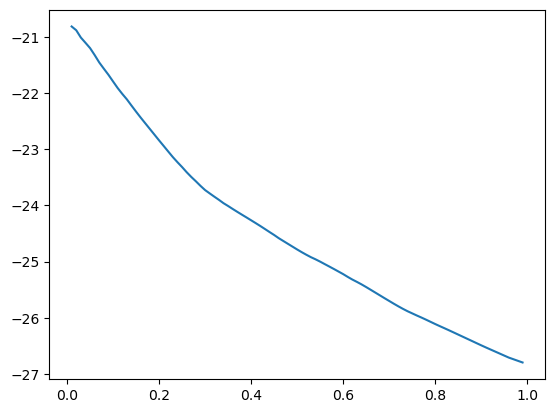

In [36]:
plt.plot(alpha,error)

In [37]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])

In [41]:
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.01,-20.818434


In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train,y_train, scoring = "neg_mean_absolute_error", cv = 3))


-7.378184177103383

In [46]:
from sklearn.model_selection import GridSearchCV
parameters =  {'n_estimators': range(10,300,10), 'criterion': ('squared_error', 'absolute_error'), 'max_features': ('auto', 'sqrt', 'log2')}
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv =3)
gs.fit(X_train,y_train)
gs.best_score_

D:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
174 fits failed out of a total of 522.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
174 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Users\dhruv\anaconda3\Lib\site-packag

-7.3700669769950755

In [47]:
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=150)

In [50]:
tpred_lm  = lm.predict(X_test)
tpred_lm_l  = lm_l.predict(X_test)
tpred_rf  = gs.best_estimator_.predict(X_test)

In [52]:
tpred_lm
tpred_lm_l
tpred_rf

array([ 94.93333333, 184.50666667, 143.83333333,  88.19936508,
        73.66333333, 119.5       , 161.5       , 123.07222222,
       160.        , 109.08666667,  94.80666667, 165.80222222,
        73.07666667,  99.46333333,  94.80666667,  94.80666667,
        95.71333333,  95.71333333,  76.11666667,  98.        ,
       112.5       ,  94.80666667, 113.56      ,  86.99      ,
       117.5       ,  99.38666667, 130.6894436 ,  93.92666667,
        93.5       , 203.02066665,  84.64230556,  74.48      ,
        99.38666667,  74.48      , 167.5       , 127.46666667,
       136.54411905,  73.07666667, 122.44648148,  98.10666667,
        84.22777778,  93.92666667,  98.10666667,  89.22      ,
       167.5       , 127.46666667,  86.17      , 150.        ,
       184.50666667, 248.        , 101.13      ,  77.59428571,
        93.92666667,  86.99      , 190.        ,  86.99      ,
       155.47666667,  74.48      , 193.        , 106.29666667,
       214.81333333,  92.74222619, 151.02333333, 130.77

In [54]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lm_l))
print(mean_absolute_error(y_test,tpred_rf))

19.156047564314026
19.16062096027273
5.920052056419943


In [55]:
mean_absol(tpred_lm + tpred_rf)/2

array([ 93.96666667, 187.9828571 , 144.82818408,  76.59968254,
        79.98499605, 127.51203397, 161.21681251,  90.89979783,
       159.5810427 , 120.08667068,  88.25000395, 135.91645228,
        79.47731186, 103.67576019,  88.25000395,  88.25000395,
       118.83187633, 118.83187633,  86.61684715, 105.81720796,
       129.66313729,  88.25000395, 142.7312673 ,  98.21128718,
       124.57924297,  88.25695658, 137.4827239 ,  95.32254388,
        88.07504047, 206.02919247,  90.08745681,  73.49      ,
        88.25695658,  73.49      , 182.09992466, 127.48333333,
       135.12082548,  79.47731186, 116.61422205,  98.05333333,
        89.74722009,  95.32254388,  98.05333333, 114.54272148,
       182.09992466, 127.48333333,  92.75619355, 155.07492447,
       187.9828571 , 222.43618483,  97.36608227,  67.62547292,
        95.32254388,  98.21128718, 180.19917819,  98.21128718,
       147.67587042,  73.49      , 186.38226518, 106.14833333,
       181.01769494,  93.9919588 , 147.94050453, 132.84